In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [4]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [5]:
cat.load(1.0, HOD='abRedMagic')

1.0


/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.4.dev4134-py2.7-linux-x86_64.egg/halotools/empirical_models/factories/hod_model_factory.py:854: UserWarning: The composite model received multiple component models 
with a new_haloprop_func_dict that use the halo_local_density_percentile key. 
Ignoring the one that appears in the occupation component for satellites galaxies
  warn(msg % (example_repeated_element, feature_name, gal_type))


In [6]:
cat.sf_idxs

array([34, 90])

In [7]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo']

In [60]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e4), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e14

In [9]:
print float(sum(mass_cut))/len(mass_cut)

0.00154579807109


In [10]:
print cat.pmass

591421440.0


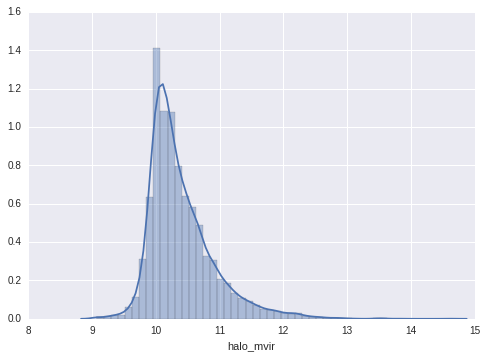

In [11]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_mvir'][rand_idxs]), hist=True, kde=True)

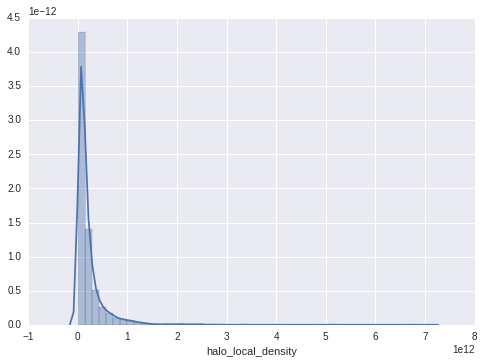

In [12]:
sns.distplot(cat.halocat.halo_table['halo_local_density'][rand_idxs], hist=True, kde=True)

In [13]:
other_density = np.loadtxt('densities.npy')

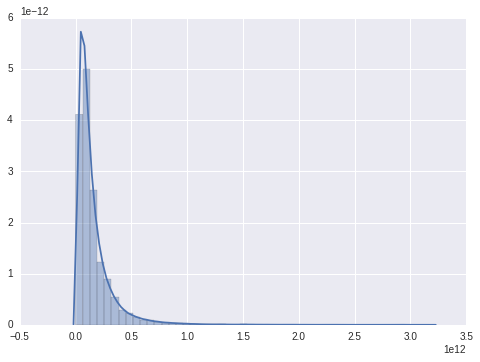

In [14]:
sns.distplot(other_density, hist=True, kde=True)

In [15]:
print min(cat.halocat.halo_table['halo_local_density'][rand_idxs])
print max(cat.halocat.halo_table['halo_local_density'][rand_idxs])

7454909533.62
7.1011401903e+12


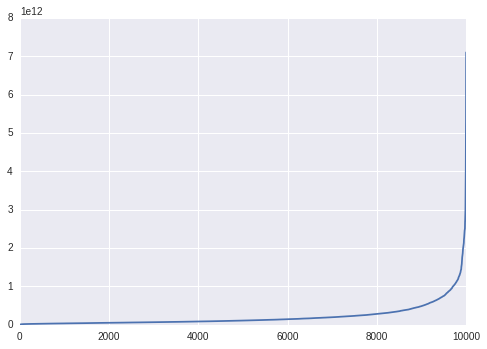

In [16]:
plt.plot(sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]))

In [17]:
vol = 4*np.pi/3*(5**3)

In [18]:
print sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]*vol/(100*cat.pmass))[:50]

[65.999999999999986, 67.999999999999986, 78.999999999999986, 82.999999999999972, 84.999999999999972, 86.999999999999972, 93.999999999999972, 95.999999999999986, 95.999999999999986, 95.999999999999986, 99.999999999999986, 101.99999999999999, 102.99999999999999, 103.99999999999999, 105.99999999999999, 108.99999999999999, 110.99999999999999, 111.99999999999997, 114.99999999999999, 114.99999999999999, 115.99999999999999, 116.99999999999999, 119.99999999999999, 120.99999999999999, 120.99999999999999, 121.99999999999999, 122.99999999999999, 122.99999999999999, 123.99999999999999, 123.99999999999999, 123.99999999999999, 123.99999999999999, 124.99999999999999, 124.99999999999999, 124.99999999999999, 126.99999999999999, 128.99999999999997, 128.99999999999997, 128.99999999999997, 129.99999999999997, 133.99999999999997, 133.99999999999997, 134.99999999999997, 134.99999999999997, 135.99999999999997, 135.99999999999997, 135.99999999999997, 136.99999999999997, 138.99999999999997, 138.99999999999997]

In [61]:
rho_b = cat.halocat.halo_table['halo_local_density']

In [62]:
rho_halo = cat.halocat.halo_table['halo_mvir']/(4*np.pi/3*cat.halocat.halo_table['halo_rvir']**3)

In [63]:
print rho_b.mean(), other_density.mean()

211253863451.0 160751436103.0


In [64]:
print rho_b.std(), other_density.std()

320298487373.0 181058312891.0


In [65]:
relative_density = rho_halo/rho_b

(array([  3.30697400e+06,   3.58795700e+06,   2.74291800e+06,
          2.08114200e+06,   1.57338400e+06,   1.18645400e+06,
          8.97036000e+05,   6.72091000e+05,   5.26970000e+05,
          3.96979000e+05,   3.02481000e+05,   2.28534000e+05,
          1.75644000e+05,   1.29647000e+05,   9.81240000e+04,
          7.84870000e+04,   5.68470000e+04,   4.41570000e+04,
          3.40230000e+04,   2.86360000e+04,   1.84520000e+04,
          1.56420000e+04,   1.33240000e+04,   9.22100000e+03,
          7.81200000e+03,   5.29600000e+03,   4.43200000e+03,
          3.86100000e+03,   2.40800000e+03,   2.10300000e+03,
          1.84000000e+03,   1.50000000e+03,   1.28000000e+03,
          7.52000000e+02,   9.53000000e+02,   5.43000000e+02,
          5.08000000e+02,   4.35000000e+02,   3.41000000e+02,
          3.31000000e+02,   1.41000000e+02,   2.41000000e+02,
          1.06000000e+02,   1.95000000e+02,   7.20000000e+01,
          1.29000000e+02,   5.30000000e+01,   5.30000000e+01,
        

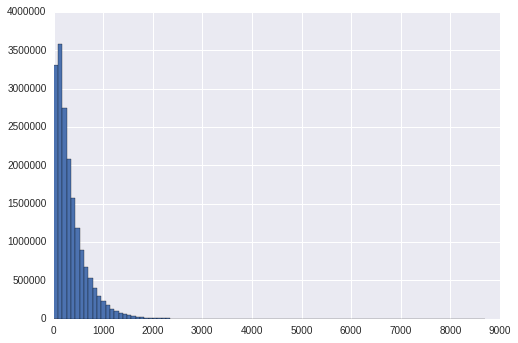

In [66]:
plt.hist(relative_density, bins=100)

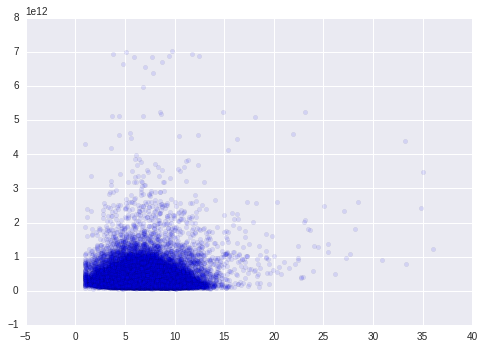

In [25]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], alpha=0.1)

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19184048 but corresponding boolean dimension is 18241063
  if __name__ == '__main__':


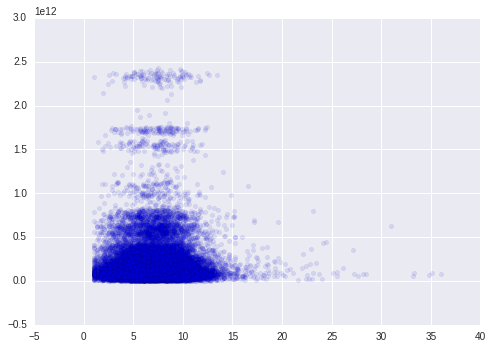

In [26]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], alpha=0.1)

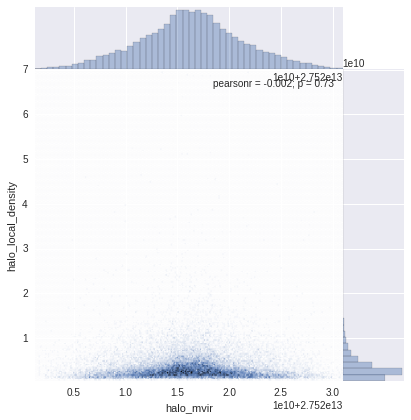

In [59]:
sns.jointplot(cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3),\
         cat.halocat.halo_table['halo_local_density'][mass_cut]/100, kind = 'hex', space=0)

In [67]:
ratio = (cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3))/cat.halocat.halo_table['halo_local_density'][mass_cut]

In [68]:
ratio.mean(), ratio.std()

(36.327441173702759, 14.225279340396765)

/afs/slac.stanford.edu/u/ki/swmclau2/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 19184048 but corresponding boolean dimension is 18241063
  if __name__ == '__main__':


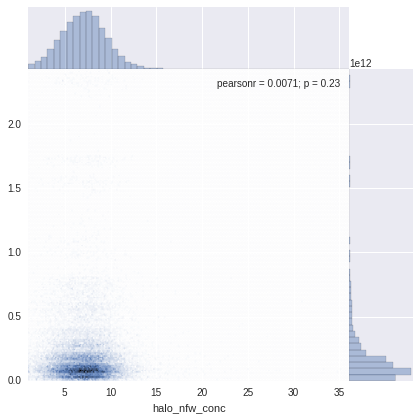

In [28]:
sns.jointplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], kind = 'hex', space=0)

In [29]:
from scipy.stats import pearsonr
print pearsonr(cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],\
         cat.halocat.halo_table['halo_local_density'][rand_idxs])[0]

0.139045071076


In [30]:
cat.model.sec_haloprop_key = 'halo_local_density'

In [31]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': 0.5,
 'mean_occupation_satellites_assembias_param1': 0.5,
 'sigma_logM': 0.46}

In [32]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [33]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

'mean_occupation_centrals_assembias_param1'

In [34]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = 0.0
fiducial_point['mean_occupation_satellites_assembias_param1'] = 0.0

In [35]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [36]:
cat.model.param_dict

{'alpha': 1.02,
 'f_c': 0.19,
 'logM0': 12.2,
 'logM1': 13.7,
 'logMmin': 12.1,
 'mean_occupation_centrals_assembias_param1': 0.0,
 'mean_occupation_satellites_assembias_param1': 0.0,
 'sigma_logM': 0.46}

In [37]:
cat.calc_number_density()

0.001091921875

In [38]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [39]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [40]:
wp_vals.shape

(10, 14)

In [41]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

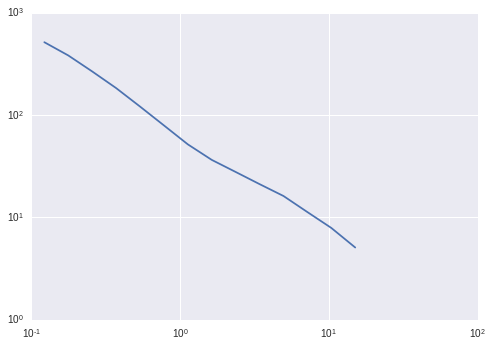

In [42]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [43]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

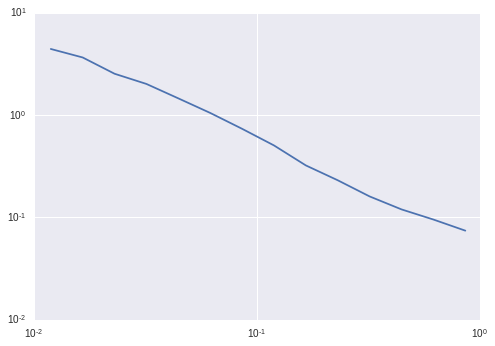

In [44]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [45]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [46]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [47]:
errs = np.sqrt(np.diag(cov))
print errs

[  1.09422168e+02   1.29575191e+01   4.24589187e+00   1.88664681e+00
   8.18474376e-01   4.09475761e-01   1.88337947e-01   8.11937538e-02
   2.42274716e-02   9.87275037e-03   7.32147756e-03]


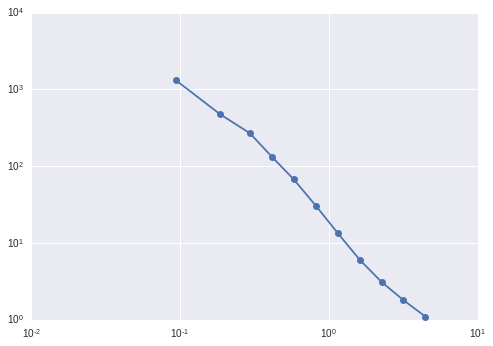

In [48]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [49]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [50]:
errs = np.sqrt(np.diag(cov))
print errs

[  1.17027347e+01   3.75727700e+00   1.67948822e+00   9.60579396e-01
   7.57212624e-01   3.93583814e-01   1.90019686e-01   8.14614757e-02
   2.52191791e-02   9.68986603e-03   7.17298139e-03]


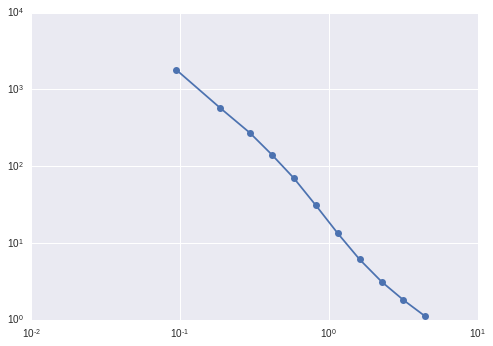

In [51]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()